In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore



DeSeqOutputAllConds = 'DeSeqOutputAllConds.tsv'
si2_si4_RNA_seq = 'si2-si4_RNA-seq-pipeline-output-normalized.tsv'
le = LabelEncoder()
oh_enc = OneHotEncoder(handle_unknown='ignore')
plsr = PLSRegression(n_components=2)


def getTSVFile(filepath):
    data = pd.read_csv (filepath, sep = '\t')
    return data

#not used or necessary
def integerEncode(dataframe, columnNametoEncode, newEncodedColumnName):
    dataframe[columnNametoEncode] = le.fit_transform(df[newEncodedColumnName])
    return dataframe
  
#https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python  
def oneHotEncode(df, columnsToEncode):
    
    for column in columnsToEncode:
        # Get one hot encoding of column and drop 'column'
        one_hot = pd.get_dummies(df[column], drop_first=True)
        # Drop column  as it is now encoded
        df = df.drop(column, axis = 1)
        # Join the encoded df
        df = df.join(one_hot)
    
    return df


def zScoreData(df, columnsToZScore):
    for column in columnsToZScore:
        df[column] = zscore(df[column])
        
    return df

def fixBadChromosomeLabeling(df, column='chrom'): 
    replace = list(range(1, 23)) + ['X', 'Y']
    
    for i in replace:
        df[column].replace(str(i), 'chr' + str(i), inplace=True)
        
    return df


In [8]:
df = getTSVFile(si2_si4_RNA_seq)
df = df.loc[df['counts'] > 0]#Filter out rows where count is zero
df = fixBadChromosomeLabeling(df)

print(df['chrom'].unique())

#Set up copies to play around with lader
df_original = df.copy()

#Remove unnecessary columns
#['experiment', 'sampleID', 'counts', 'tpm', 'gene_name', 'chrom'] Leon..KEEP
df = df[['sampleID', 'tpm', 'chrom']]


df = oneHotEncode(df, ['sampleID', 'chrom'])
df = zScoreData(df, ['tpm'])

df[:5]

#Leon if you want to get top n%
# Probably simpler - https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.nlargest.html
# Sort, .head(...) - https://stackoverflow.com/questions/53405458/selecting-the-top-50-percentage-names-from-the-columns-of-a-pandas-dataframe



['chrX' 'chr20' 'chr1' 'chr6' 'chr3' 'chr7' 'chr12' 'chr11' 'chr4' 'chrY'
 'chr17' 'chr2' 'chr16' 'chr8' 'chr19' 'chr9' 'chr13' 'chr14' 'chr5'
 'chr22' 'chr10' 'chr18' 'chr15' 'chr21' 'chrM' 'chr1_KI270711v1_random'
 'GL000219.1' 'GL000195.1' 'KI270734.1' 'GL000218.1' 'GL000009.2'
 'GL000194.1' 'KI270713.1']


,tpm,02-TGFb-med,03-RA-low,04-EtOH-highDensity,05-EtOH-nlDensity,06-RA-high,07-EtOH-halfDensity,08-TGFb-and-RA-low,09-TGFb-and-RA-med,10-TGFb-high,...,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chrM,chrX,chrY
0,-0.075140,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.601760,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.086996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.088647,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.091294,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [6]:
df_test = df_original.copy()
df_test = df_test.loc[df_test['counts'] > 0]


print(len(df_test['gene_name'].unique()))

#Group by gene and therapeutic level, sorting by average tpm value w/ highest tpm first, 
#getting top 20

#print(len(df_test[['gene_name'== 'MT-CO2', 'sampleID' =='35-TGFb-and-RA-high']]))
df_test.query('gene_name=="MT-CO2" & sampleID=="35-TGFb-and-RA-high"')



#Homework: Get top 10 results, for gene_name, sampleID, and both and PLOT IT
df_test.groupby(['gene_name', 'sampleID' ]).mean().sort_values(by=['tpm'], ascending=False)[:20]


#1. One hot encode the genes. When they are numbers they wont disappear using 'groupby'
#2. Groupby by sampleID(treatments)
#3. Remove columns [counts, rpm, rpkm, tx_start, tx_end, TSS_loc]
#4. Transpose the dataframe so the genes are the row
#5. Sort by tpm and get top n results. So you top 20 genes
#6. Transpose it back and now you have top 20 columns




22112


counts          rpm          rpkm  \
gene_name sampleID                                                  
MT-CO2    35-TGFb-and-RA-high  85573.0  7775.925970  11368.312822   
          31-TGFb-high         82408.0  7040.157466  10292.627874   
          14-EtOH-highDensity  56087.0  6669.206547   9750.301969   
          20-EtOH-halfDensity  60635.0  5830.951732   8524.783234   
          36-RA-low            63051.0  5752.710893   8410.396043   
          12-RA-med            53715.0  5811.451269   8496.273785   
          33-TGFb-low          60700.0  5633.969102   8236.796933   
          32-RA-high           62147.0  5616.004189   8210.532440   
          34-EtOH-highDensity  60860.0  5471.593654   7999.405927   
          27-EtOH-nlDensity    63087.0  5543.266864   8104.191322   
          06-RA-high           58482.0  5481.827024   8014.366995   
          23-RA-high           47073.0  5503.184267   8045.591033   
          04-EtOH-highDensity  54237.0  5461.551831   7984.724899   
          26-RA-med            57521.0  5475.965670   8005.797763   
          07-EtOH-halfDensity  55567.0  5452.247478   7971.122045   
          01-TGFb-low          56633.0  5275.031320   7712.034093   
          09-TGFb-and-RA-med   47954.0  5242.754260   7664.845409   
          05-EtOH-nlDensity    61033.0  5314.992069   7770.456242   
          02-TGFb-med          57075.0  5241.817942   7663.476524   
          10-TGFb-high         49537.0  5192.947395   7592.028356   

                                        tpm  tx_start  tx_end  TSS_loc  
gene_name sampleID                                                      
MT-CO2    35-TGFb-and-RA-high  40095.437187    7585.0  8269.0   7585.0  
          31-TGFb-high         37089.321282    7585.0  8269.0   7585.0  
          14-EtOH-highDensity  34573.327005    7585.0  8269.0   7585.0  
          20-EtOH-halfDensity  30770.942552    7585.0  8269.0   7585.0  
          36-RA-low            30730.360023    7585.0  8269.0   7585.0  
          12-RA-med            30633.995982    7585.0  8269.0   7585.0  
          33-TGFb-low          30175.431961    7585.0  8269.0   7585.0  
          32-RA-high           29896.222990    7585.0  8269.0   7585.0  
          34-EtOH-highDensity  29754.583288    7585.0  8269.0   7585.0  
          27-EtOH-nlDensity    29703.706371    7585.0  8269.0   7585.0  
          06-RA-high           29364.538462    7585.0  8269.0   7585.0  
          23-RA-high           29308.918755    7585.0  8269.0   7585.0  
          04-EtOH-highDensity  29257.254920    7585.0  8269.0   7585.0  
          26-RA-med            29148.383617    7585.0  8269.0   7585.0  
          07-EtOH-halfDensity  29121.523000    7585.0  8269.0   7585.0  
          01-TGFb-low          28821.487757    7585.0  8269.0   7585.0  
          09-TGFb-and-RA-med   28815.249529    7585.0  8269.0   7585.0  
          05-EtOH-nlDensity    28640.385962    7585.0  8269.0   7585.0  
          02-TGFb-med          28614.698473    7585.0  8269.0   7585.0  
          10-TGFb-high         28548.199591    7585.0  8269.0   7585.0

Index(['tpm', '02-TGFb-med', '03-RA-low', '04-EtOH-highDensity',
       '05-EtOH-nlDensity', '06-RA-high', '07-EtOH-halfDensity',
       '08-TGFb-and-RA-low', '09-TGFb-and-RA-med', '10-TGFb-high',
       '11-TGFb-and-RA-high', '12-RA-med', '13-TGFb-and-RA-low',
       '14-EtOH-highDensity', '15-EtOH-nlDensity', '16-TGFb-med',
       '19-TGFb-low', '20-EtOH-halfDensity', '21-TGFb-and-RA-high',
       '22-TGFb-high', '23-RA-high', '24-RA-low', '25-EtOH-halfDensity',
       '26-RA-med', '27-EtOH-nlDensity', '28-TGFb-and-RA-med',
       '29-TGFb-and-RA-low', '30-TGFb-med', '31-TGFb-high', '32-RA-high',
       '33-TGFb-low', '34-EtOH-highDensity', '35-TGFb-and-RA-high',
       '36-RA-low', '46-EtOH-nlDensity', '51-RA-med', '52-TGFb-and-RA-med',
       'GL000194.1', 'GL000195.1', 'GL000218.1', 'GL000219.1', 'KI270713.1',
       'KI270734.1', 'chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14',
       'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr1_KI270711v1_random',
       'chr2', 'chr20

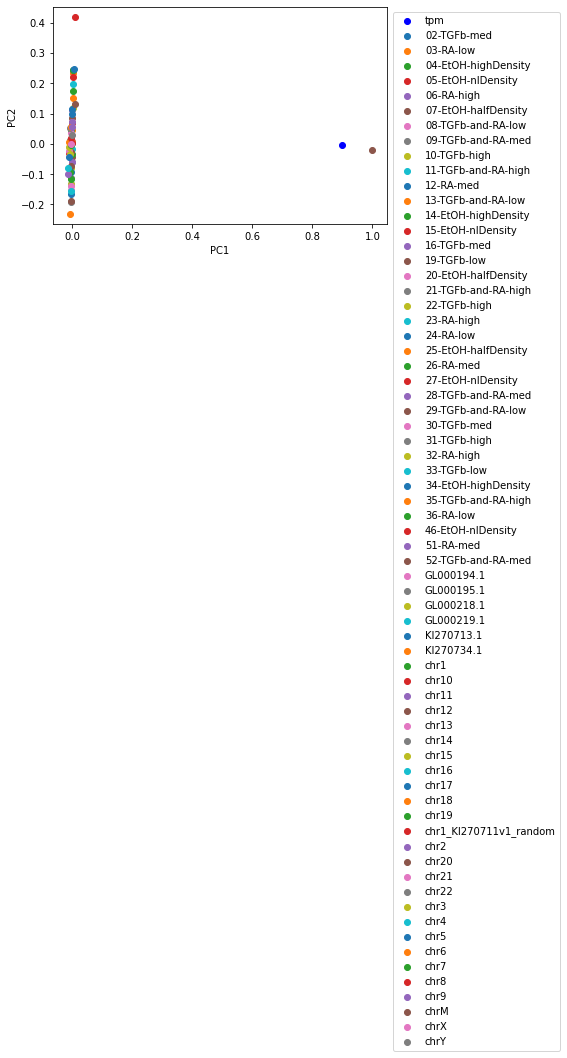

In [5]:
def printPLSRPlot(x_loadings_, y_loadings_, loadings):
    plt.scatter(y_loadings_[:, 0], y_loadings_[:, 1], color='blue', label='tpm')
    
    for i in range(x_loadings_.shape[0]):
        plt.scatter(x_loadings_[i,0], x_loadings_[i, 1], label=loadings[i])
        
    plt.legend(bbox_to_anchor=(1.53, 1))
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()


df_plsr = df_original.copy()
df_plsr = df_plsr[['sampleID', 'chrom', 'gene_name', 'tpm']]
df_plsr = oneHotEncode(df_plsr, ['sampleID', 'chrom'])
df_plsr = df_plsr.groupby(['gene_name']).mean().sort_values(by=['tpm'], ascending=False)


print(df_plsr.columns)

df_plsr[:10]

#Can I transpose the dataframe and plot this??

# df_plsr = df_plsr[['sampleID', 'tpm', 'chrom']]
# df_plsr = oneHotEncode(df_plsr, ['sampleID', 'chrom'])
# df_plsr = zScoreData(df_plsr, ['tpm'])

loadings = [col for col in df_plsr.columns if col != 'tpm'] #Remove 'tpm' to fit for PLSR
plsr.fit(df_plsr[loadings], df_plsr['tpm'])
print('PLSR Variance captured: ', plsr.score(df_plsr[loadings], df_plsr['tpm']))
printPLSRPlot(plsr.x_loadings_, plsr.y_loadings_, loadings)




    Variance for PCs = [0.78440204 0.21156343 0.0026108 ] 
    Sum of variances = 0.999  
    pca.shape = (3, 15) where rows=loadings=15, columns=PCs=3


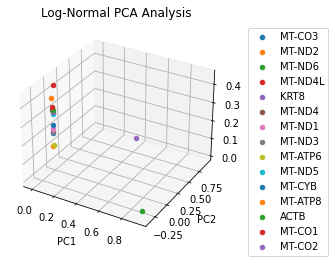


    Variance for PCs = [0.60421674 0.17176473 0.09608637] 
    Sum of variances = 0.872  
    pca.shape = (3, 15) where rows=loadings=15, columns=PCs=3


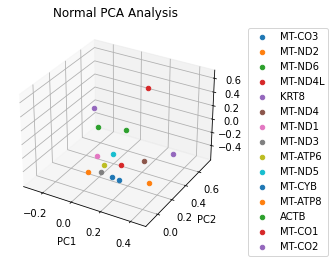

In [14]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)

#Guys if you increase the number of PCs you get a lot more variance


def printPCA_2D(new_df, title):
    pca.fit(new_df)

    print('''
    Variance for PCs = %s 
    Sum of variances = %.03f  
    pca.shape = %s where rows=loadings=%d, columns=PCs=%d''' 
          % (pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_), 
             pca.components_.shape, pca.components_.shape[1], pca.components_.shape[0]))
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(title)

    for i in range(pca.components_.shape[1]):
        plt.scatter(pca.components_[0, i], pca.components_[1, i], label=new_df.columns[i])


    plt.legend(bbox_to_anchor=(1.25, 1)) 
    plt.show()
    
def printPCA_3D(new_df, title):
    pca.fit(new_df)

    print('''
    Variance for PCs = %s 
    Sum of variances = %.03f  
    pca.shape = %s where rows=loadings=%d, columns=PCs=%d''' 
          % (pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_), 
             pca.components_.shape, pca.components_.shape[1], pca.components_.shape[0]))
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    plt.xlabel('PC1')
    plt.ylabel('PC2')

    plt.title(title)

    for i in range(pca.components_.shape[1]):
        ax.scatter(xs=pca.components_[0, i], ys=pca.components_[1, i], 
                       zs=pca.components_[2, i], label=new_df.columns[i])


    plt.legend(bbox_to_anchor=(1.5, 1)) 
    plt.show()


def getPCA_DFs(groupby=['sampleID', 'gene_name'], columns=['sampleID', 'tpm', 'gene_name'], topN=5000):
    df_pca = df_original.copy()
    df_pca = df_pca[columns]


    gb = df_pca.groupby(groupby).mean().sort_values(by=['tpm'], ascending=False)[:topN]
    #Extract rows and columns of top N results by indices
    rows = set([groupby[0] for groupby in gb.index])
    columns = set([groupby[1] for groupby in gb.index])

    #Create a new dataframe
    new_df = pd.DataFrame(0, index=rows, columns=columns)
    new_df_log = new_df.copy()

    #Iterate
    for (row, col) in gb.index:
        tpv_val = gb.loc[row, col].tpm
        new_df.loc[row, col] = tpv_val
        new_df_log.loc[row, col] = np.log(tpv_val)
        
    return new_df, new_df_log


#display(new_df)
groupby=['sampleID', 'gene_name'] #Should only be two things! groupby[0] = row, groupby[1] = column
new_df, new_df_log = getPCA_DFs(topN=500)
printPCA_3D(new_df_log, title='Log-Normal PCA Analysis' )
printPCA_3D(new_df, title='Normal PCA Analysis' )

